## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "Mouse_Metadata.csv"
study_results_path = "Study_Results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(
    left=mouse_metadata, 
    right=study_results, 
    on="Mouse ID")

In [2]:
# Checking the number of mice in the DataFrame.
len(merge_df)

1893

In [3]:
time_0 = merge_df.loc[
    merge_df['Timepoint']==0,
    :
]

In [4]:
total_mice = time_0['Mouse ID'].value_counts()

In [5]:
duplicate_mouse = total_mice.loc[
    total_mice > 1
].index[0]

In [6]:
clean_data = merge_df.loc[
    merge_df["Mouse ID"]!= duplicate_mouse,
    :
]

In [7]:
clean_data['Mouse ID'].nunique()

248

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
len(clean_data)

1880

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volue_mean_regimen_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median_regimen_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance_regimen_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_stdev_regimen_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem_regimen_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
pd.DataFrame({
    "Mean": tumor_volue_mean_regimen_df,
    "Median": tumor_volume_median_regimen_df,
    "Variance": tumor_volume_variance_regimen_df, 
    "Standard Deviation": tumor_volume_stdev_regimen_df, 
    "SEM": tumor_volume_sem_regimen_df
})
# This method produces everything in a single groupby function.


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_by_regimen = clean_data["Drug Regimen"].value_counts()
mice_by_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot:title={'center':'Number of Mice by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

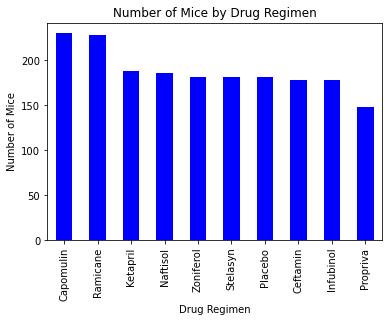

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_by_regimen.plot(kind='bar',
                 color='b',
                 ylabel='Number of Mice',
                 xlabel='Drug Regimen',
                 title='Number of Mice by Drug Regimen'
)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

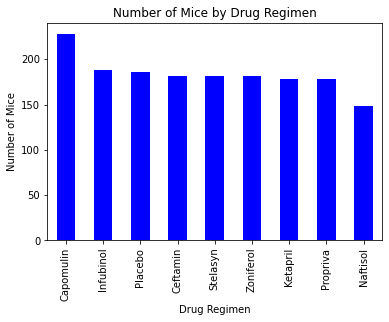

In [68]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_by_regimen))
y_axis = mice_by_regimen
regimen_names = clean_data["Drug Regimen"].unique()
tick_location = [value for value in x_axis]
plt.xticks(tick_location, regimen_names, rotation='vertical')
plt.bar(
    x_axis,
    y_axis,
    color='b',
    width = 0.5
)
plt.xlim(0.5,len(x_axis)-0.5)
plt.ylim(0,max(y_axis)+10)
plt.title("Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.plot

## Pie Plots

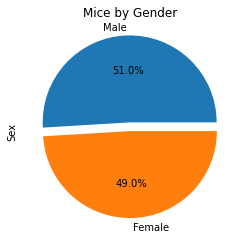

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = clean_data["Sex"].value_counts()
sex_df = sex_count.plot(kind='pie',
        title="Mice by Gender",
        autopct='%1.1f%%',
        explode=[0.1, 0]
)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

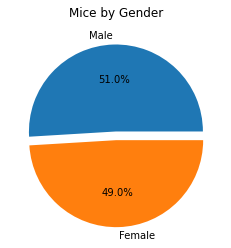

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mylabels = ["Male", "Female"]
plt.pie(
    sex_count,
    labels = mylabels,
    autopct='%1.1f%%',
    explode = (0, 0.1))
plt.title("Mice by Gender")
plt.plot

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

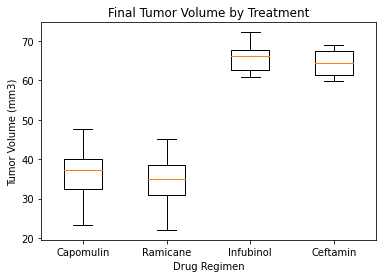

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# IQR = Q3 - Q1
final_tumor_volume = clean_data.loc[clean_data["Timepoint"]==45]
capomulin = final_tumor_volume.loc[
    final_tumor_volume['Drug Regimen']=='Capomulin',
    'Tumor Volume (mm3)']
capomulin_quartiles = capomulin.quantile(q=[.25,.5,.75])
lowerq = capomulin.quantile(q=.25)
upperq = capomulin.quantile(q=.75)
iqr1 = upperq - lowerq

ramicane = final_tumor_volume.loc[
    final_tumor_volume['Drug Regimen']=='Ramicane',
    'Tumor Volume (mm3)']
ramicane_quartiles = ramicane.quantile(q=[.25,.5,.75])
lowerq = ramicane.quantile(q=.25)
upperq = ramicane.quantile(q=.75)
iqr2 = upperq - lowerq

infubinol = final_tumor_volume.loc[
    final_tumor_volume['Drug Regimen']=='Infubinol',
    'Tumor Volume (mm3)']
infubinol_quartiles = infubinol.quantile(q=[.25,.5,.75])
lowerq = infubinol.quantile(q=.25)
upperq = infubinol.quantile(q=.75)
iqr3 = upperq - lowerq

ceftamin = final_tumor_volume.loc[
    final_tumor_volume['Drug Regimen']=='Ceftamin',
    'Tumor Volume (mm3)']
ceftamin_quartiles = ceftamin.quantile(q=[.25,.5,.75])
lowerq = ceftamin.quantile(q=.25)
upperq = ceftamin.quantile(q=.75)
iqr4 = upperq - lowerq

data = [capomulin, ramicane, infubinol, ceftamin]
ticks = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.title("Final Tumor Volume by Treatment")
plt.boxplot(data, labels=ticks)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
# no outliers

## Line and Scatter Plots

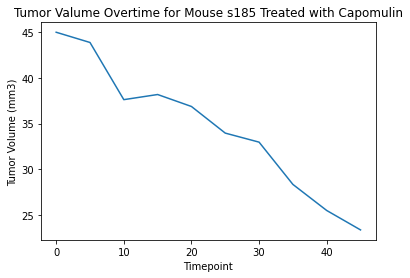

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
treatment_capomulin = clean_data.loc[
    clean_data["Drug Regimen"]== "Capomulin"]
mouse_s185 = treatment_capomulin.loc[
    treatment_capomulin["Mouse ID"]=='s185']
mouse_s185
x_axis = mouse_s185["Timepoint"]
y_axis = mouse_s185["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.title("Tumor Valume Overtime for Mouse s185 Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

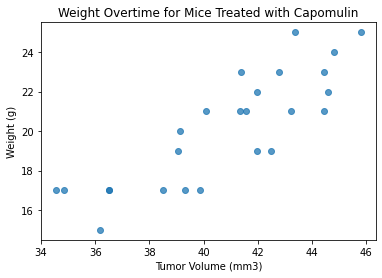

In [43]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_capomulin = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
x_axis = mouse_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
y_axis = mouse_capomulin.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(
    x_axis,
    y_axis,
    marker="o", 
    alpha=0.75
)
plt.title("Weight Overtime for Mice Treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show

## Correlation and Regression

The correlation between both factors is 0.84


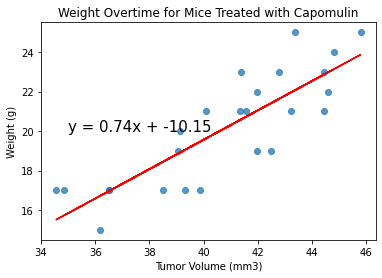

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_capomulin = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
x_axis = mouse_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
y_axis = mouse_capomulin.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(
    x_axis,
    y_axis,
    marker="o", 
    alpha=0.75
)
plt.title("Weight Overtime for Mice Treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)    
regress_values = x_axis * slope + intercept                                      
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")                     
plt.annotate(line_eq,(35,20),fontsize=15)
correlation = stats.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

3 Observations:

1.) Although the study included approximately the same number of male and female mice, there were slightly more male mice studied
2.) Capomulin and Ramicane were the most successful of the 4 treatments as they resulted in the least final tumor volume
3.) For mice treated with Capomulin, as weight increased, tumor volume also increased